<h1> <center> Comprehensive Sales Analysis of Target Company Using SQL and Python Visualization Libraries

## About the Dataset

Target is a globally recognized brand and a leading retailer in the United States, known for offering exceptional value, inspiration, innovation, and a unique shopping experience.

This dataset focuses on Target's operations in Brazil, covering 100,000 orders placed between 2016 and 2018. It includes detailed information on order status, pricing, payment and shipping performance, customer locations, product attributes, and customer reviews.

## Features

The data is available in 8 CSV files:

- `customers.csv`
- `sellers.csv`
- `order_items.csv`
- `geolocation.csv`
- `payments.csv`
- `orders.csv`
- `products.csv`
- `reviews.csv`

##### Dataset link : https://www.kaggle.com/datasets/devarajv88/target-dataset?select=products.csv

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

import mysql.connector

# connect with database
db = mysql.connector.connect(host='localhost',
                            username = 'root',
                            password = '1234',
                            database = 'ecommerce') 

# to activate the cursor
cur = db.cursor() 


## <c> List all unique cities where customers are located located

In [2]:
query = """ select distinct customer_city from customers"""

cur.execute(query)
data = cur.fetchall()
data

[('franca',),
 ('sao bernardo do campo',),
 ('sao paulo',),
 ('mogi das cruzes',),
 ('campinas',),
 ('jaragua do sul',),
 ('timoteo',),
 ('curitiba',),
 ('belo horizonte',),
 ('montes claros',),
 ('rio de janeiro',),
 ('lencois paulista',),
 ('caxias do sul',),
 ('piracicaba',),
 ('guarulhos',),
 ('pacaja',),
 ('florianopolis',),
 ('aparecida de goiania',),
 ('santo andre',),
 ('goiania',),
 ('cachoeiro de itapemirim',),
 ('sao jose dos campos',),
 ('sao roque',),
 ('camacari',),
 ('resende',),
 ('sumare',),
 ('novo hamburgo',),
 ('sao luis',),
 ('sao jose',),
 ('santa barbara',),
 ('ribeirao preto',),
 ('ituiutaba',),
 ('taquarituba',),
 ('sao jose dos pinhais',),
 ('barrinha',),
 ('parati',),
 ('dourados',),
 ('trindade',),
 ('cascavel',),
 ('fortaleza',),
 ('brasilia',),
 ('pelotas',),
 ('porto alegre',),
 ('salto',),
 ('jundiai',),
 ('cacapava',),
 ('sao vicente',),
 ('uberlandia',),
 ('botelhos',),
 ('sao goncalo',),
 ('araucaria',),
 ('nova iguacu',),
 ('areia branca',),
 ('campo

## Count the number of orders placed in 2017.

In [3]:
query = """ select count(order_id) from ecommerce.orders
            where year(order_purchase_timestamp)=2017 """

cur.execute(query)
data = cur.fetchall()
"total orders places in 2017 are", data[0][0]

('total orders places in 2017 are', 45101)

<c> <h2> Find the total sales per category.

In [4]:
query = """ select upper(pr.product_category) products, round(sum(p.payment_value),2) sales from ecommerce.products pr
            join ecommerce.order_items oi on pr.product_id = oi.product_id
            join ecommerce.payments p on oi.order_id = p.order_id
            group by pr.product_category
            order by sales desc """
cur.execute(query)
data = cur.fetchall()
df = pd.DataFrame(data, columns=['products','sales'])
df.iloc[0:10]

,products,sales
0,BED TABLE BATH,1712553.67
1,HEALTH BEAUTY,1657373.12
2,COMPUTER ACCESSORIES,1585330.45
3,FURNITURE DECORATION,1430176.39
4,WATCHES PRESENT,1429216.68
5,SPORT LEISURE,1392127.56
6,HOUSEWARES,1094758.13
7,AUTOMOTIVE,852294.33
8,GARDEN TOOLS,838280.75
9,COOL STUFF,779698.00


## Calculate the percentage of orders that were paid in installments.

In [5]:
query = """ select 
        (sum(case when payment_installments>=1 then 1 else 0 end)/count(order_id))*100
        from ecommerce.payments """
cur.execute(query)
data = cur.fetchall()
print("The percentage of orders placed in installments are :",data[0][0])

The percentage of orders placed in installments are : 99.9981


## Count the number of customers from each state. 

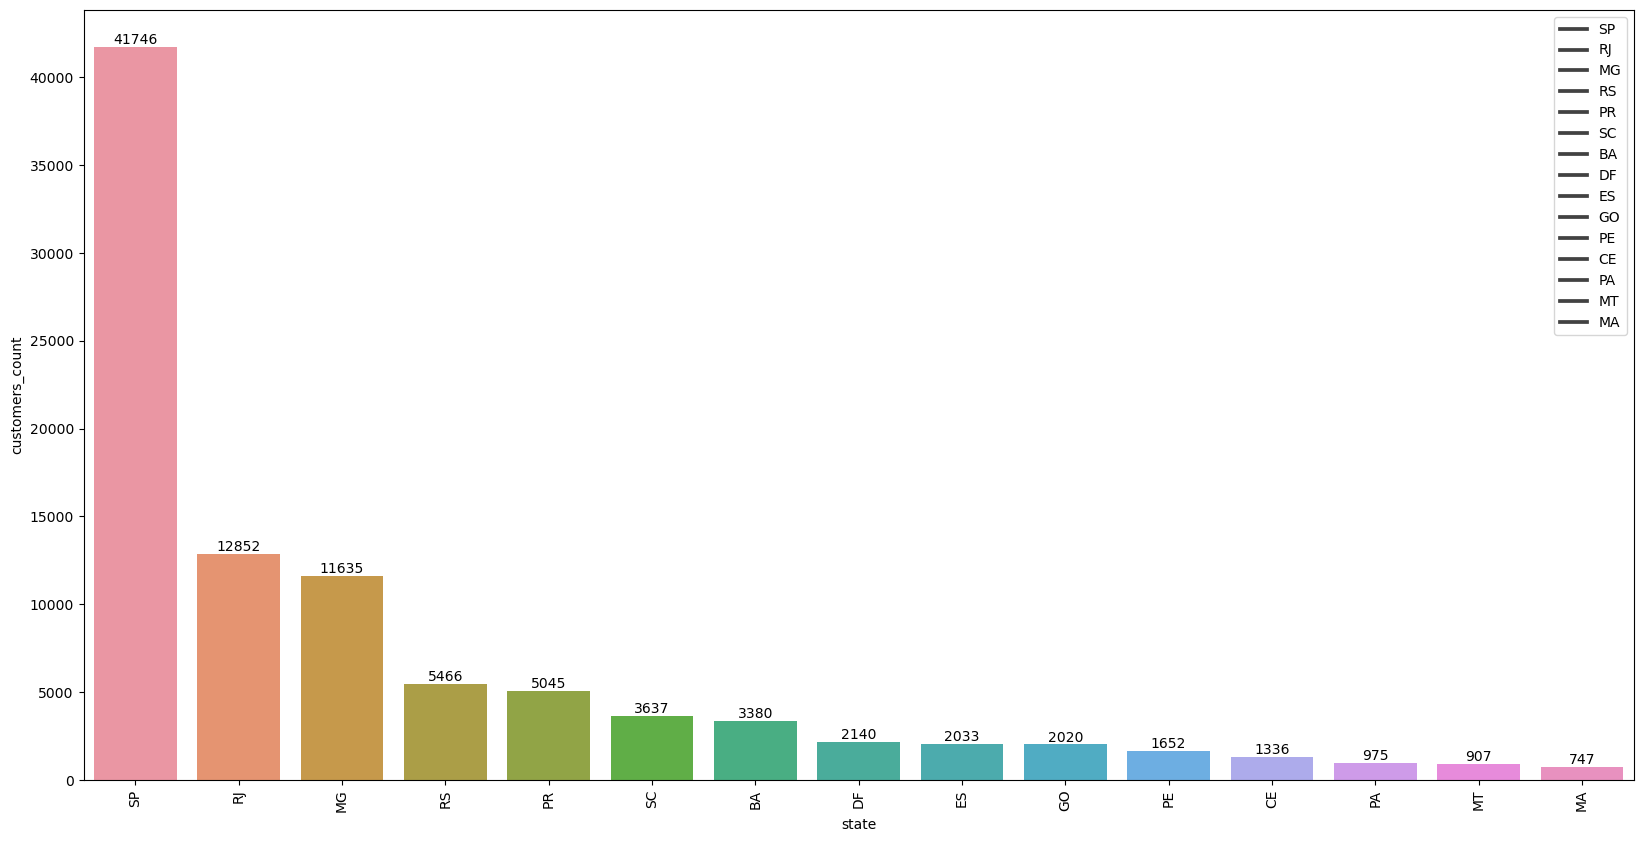

In [6]:
query = """ select customer_state , count(customer_id) customers_count from ecommerce.customers
        group by customer_state; 
        """
cur.execute(query)
data = cur.fetchall()
df= pd.DataFrame(data,columns=['state','customers_count'])
df.sort_values(by = 'customers_count', ascending=False)

plt.figure(figsize=(20,10))
plt.xticks(rotation=90)
plt.legend(df['state'])


ax =sns.barplot(x = df.sort_values('customers_count', ascending=False)['state'].head(15), y = df.sort_values(by = 'customers_count', ascending=False)['customers_count'].head(15))

ax.bar_label(ax.containers[0])

# h, l = ax.get_legend_handles_labels()
# ax.legend(h,df['state'], title='')
plt.legend(title='', labels=df.sort_values('customers_count', ascending=False)['state'].head(15))

plt.show()

<strong><h2> Calculate the number of orders per month in 2018.

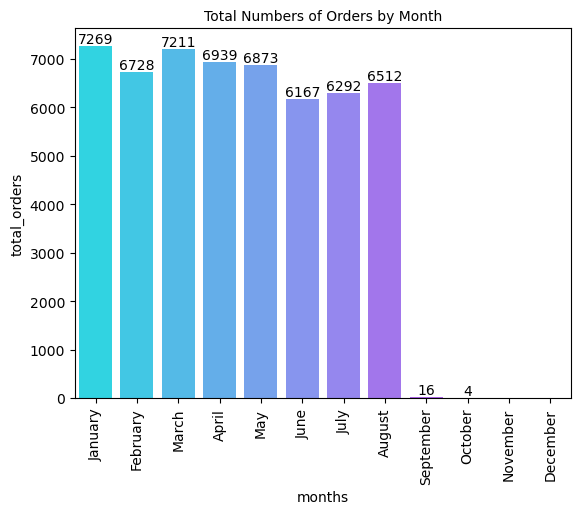

In [7]:
query = """ select monthname(order_purchase_timestamp), count(order_id) from ecommerce.orders
            where year(order_purchase_timestamp)=2018
            group by monthname(order_purchase_timestamp)
            order by monthname(order_purchase_timestamp); 
            """
cur.execute(query)
data = cur.fetchall()
df= pd.DataFrame(data,columns=['months','total_orders'])
# df.sort_values(by = 'monthname', ascending=True)
list = ['January','February','March','April','May','June','July','August','September','October','November','December']
df

ax = sns.barplot(x = df['months'], y = df['total_orders'], order= list, palette='cool')
ax.bar_label(ax.containers[0])
plt.xticks(rotation = 90)
plt.title('Total Numbers of Orders by Month',size=10)
plt.show()

In [8]:
sns.color_palette('cool') 

[(0.1411764705882353, 0.8588235294117648, 1.0),
 (0.28627450980392155, 0.7137254901960784, 1.0),
 (0.42745098039215684, 0.5725490196078431, 1.0),
 (0.5725490196078431, 0.4274509803921569, 1.0),
 (0.7137254901960784, 0.28627450980392155, 1.0),
 (0.8588235294117647, 0.14117647058823535, 1.0)]

<strong><h2> Find the average number of products per order, grouped by customer city.

In [9]:
query = """ with count_per_order as(
            select oi.order_id ,o.customer_id, count(oi.order_item_id) cnt from ecommerce.order_items oi
            join ecommerce.orders o on o.order_id = oi.order_id
            group by oi.order_id , o.customer_id)

            select customers.customer_city as city, round(avg(cnt),2) average_orders from count_per_order
            join ecommerce.customers on count_per_order.customer_id = customers.customer_id
            group by customer_city;
            """
cur.execute(query)
data = cur.fetchall()
df= pd.DataFrame(data,columns=['city','average_order'])
df

,city,average_order
0,sao jose dos campos,1.14
1,indaial,1.12
2,treze tilias,1.27
3,sao paulo,1.16
4,rio de janeiro,1.15
...,...,...
4105,buriti,3.00
4106,morro agudo de goias,1.00
4107,santa filomena,1.00
4108,guamiranga,1.00


<strong><h2>Calculate the percentage of total revenue contributed by each product category.

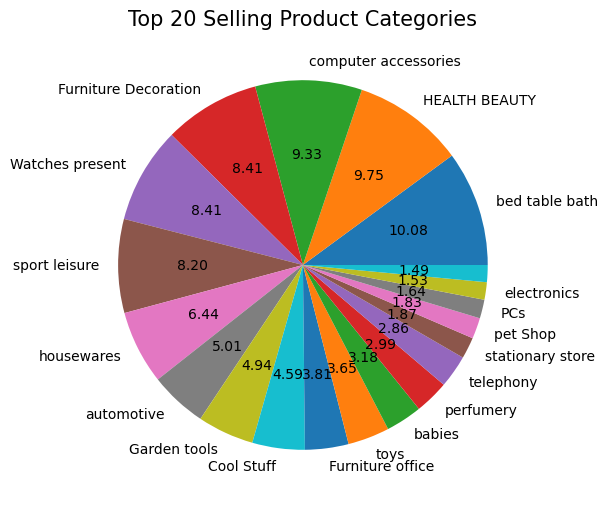

In [10]:
query = """  select product_category, 
                     round((sum(pay.payment_value)/(select sum(payment_value) from ecommerce.payments)*100),2) sales_percent 
             from ecommerce.products pr
             join ecommerce.order_items oi on pr.product_id = oi.product_id
             join ecommerce.payments pay on pay.order_id = oi.order_id
             group by product_category
             order by sales_percent Desc; """

cur.execute(query)
data = cur.fetchall()
df = pd.DataFrame(data, columns= ['category','sales_percent'])
df

plt.figure(figsize=(20,6))
plt.pie(x= df['sales_percent'].head(20), labels = df['category'].head(20),autopct= '%.2f')
plt.title('Top 20 Selling Product Categories',size =15)
plt.show()

<strong><h2>Identify the correlation between product price and the number of times a product has been purchased.

Correlation between product price and no. of times product purchased : -0.10631514167157557


<Axes: xlabel='price', ylabel='order_count'>

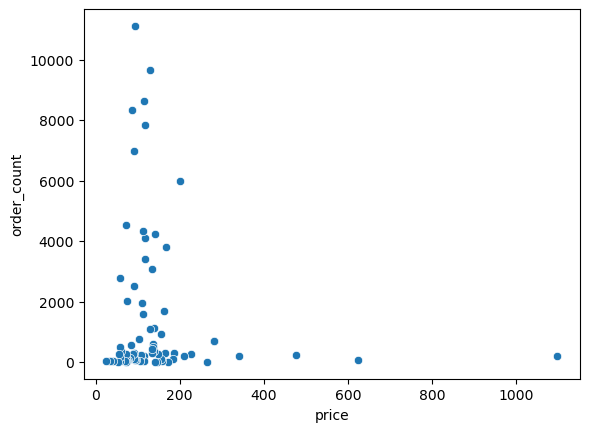

In [11]:
query = """ select upper(pr.product_category) , round(avg(oi.price),2) prices, count(oi.product_id) order_count from ecommerce.order_items oi
            join ecommerce.products pr on oi.product_id = pr.product_id
            group by pr.product_category
            order by prices desc """

cur.execute(query)
data = cur.fetchall()
df = pd.DataFrame(data, columns= ['category','price','order_count'])
df

print("Correlation between product price and no. of times product purchased :", np.corrcoef(df['price'],df['order_count'])[0][1])

sns.scatterplot(x=df['price'],y=df['order_count'])

<strong><h2>Calculate the total revenue generated by each seller, and rank them by revenue.

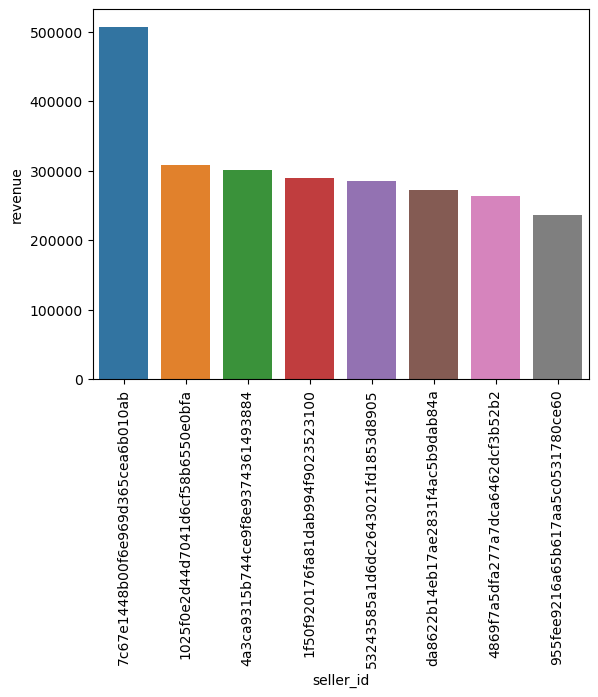

In [12]:
query = """select *,
                row_number() Over(order by revenue desc) rnk
           from (
               select s.seller_id , round(sum(pay.payment_value),2) revenue from ecommerce.sellers s
               join order_items oi on oi.seller_id = s.seller_id
               join payments pay on pay.order_id = oi.order_id
               group by s.seller_id
               order by revenue Desc
            ) t """

cur.execute(query)
data = cur.fetchall()
df = pd.DataFrame(data, columns= ['seller_id','revenue','rank'])
df
sns.barplot(x = df['seller_id'].head(8),y= df['revenue'].head(8))
plt.xticks(rotation = 90)

plt.show()

<strong><h2>Calculate the moving average of order values for each customer over their order history.

In [13]:
query = """ select customer_id, order_purchase_timestamp,
                    round(avg(payment_value) over(partition by customer_id order by order_purchase_timestamp 
                                                    rows between 2 preceding and current row),2) moving_avg
from
(
select orders.customer_id, orders.order_purchase_timestamp , payments.payment_value
from ecommerce.orders join ecommerce.payments
on orders.order_id = payments.order_id
order by orders.customer_id) t; """

cur.execute(query)
data = cur.fetchall()
df = pd.DataFrame(data, columns = ['customer_id','order_date','moving_avg'])
df

,customer_id,order_date,moving_avg
0,00012a2ce6f8dcda20d059ce98491703,2017-11-14 16:08:26,114.74
1,000161a058600d5901f007fab4c27140,2017-07-16 09:40:32,67.41
2,0001fd6190edaaf884bcaf3d49edf079,2017-02-28 11:06:43,195.42
3,0002414f95344307404f0ace7a26f1d5,2017-08-16 13:09:20,179.35
4,000379cdec625522490c315e70c7a9fb,2018-04-02 13:42:17,107.01
...,...,...,...
103881,fffecc9f79fd8c764f843e9951b11341,2018-03-29 16:59:26,27.12
103882,fffeda5b6d849fbd39689bb92087f431,2018-05-22 13:36:02,63.13
103883,ffff42319e9b2d713724ae527742af25,2018-06-13 16:57:05,214.13
103884,ffffa3172527f765de70084a7e53aae8,2017-09-02 11:53:32,45.50


<strong><h2> Calculate the cumulative sales per month for each year.

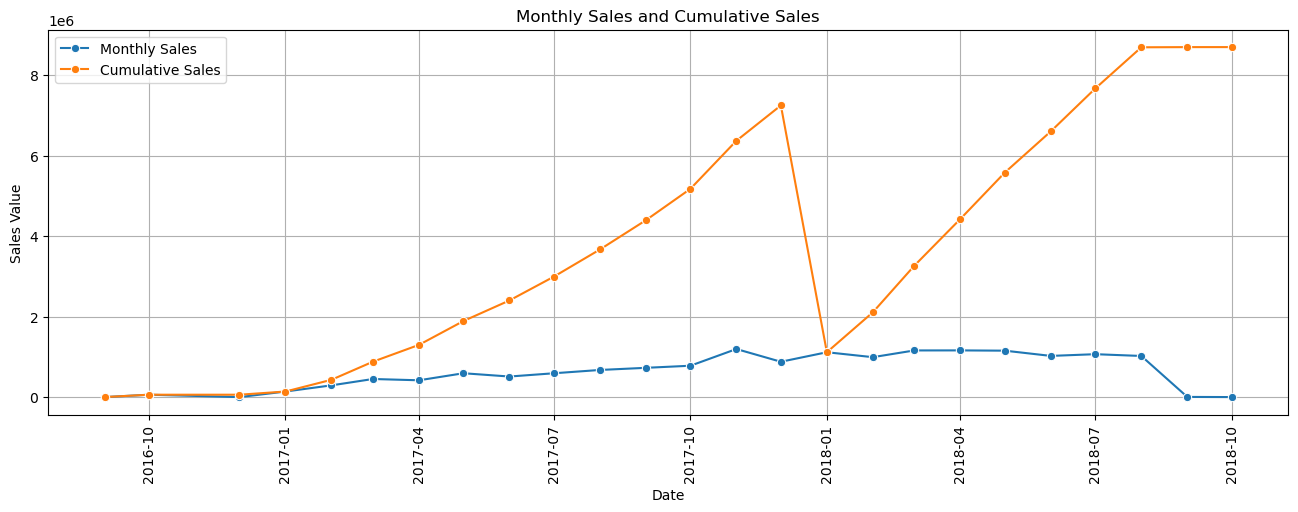

In [14]:
query = """ select 
        *, 
        sum(sales) over(partition by years order by months
                        rows between unbounded preceding and current row) as 'running_total/cummulative_sum'
from(
        select year(orders.order_purchase_timestamp) as years, month(orders.order_purchase_timestamp) months, round(sum(payments.payment_value),2) sales
        from ecommerce.orders
        join ecommerce.payments on orders.order_id = payments.order_id
        group by years,month(orders.order_purchase_timestamp)
        order by years,month(orders.order_purchase_timestamp)
) t; """

cur.execute(query)
data = cur.fetchall()
df = pd.DataFrame(data, columns= ['year','months','sales','cumulative_sales'])
df

# Convert 'months' and 'years' into a datetime object for better plotting
df['date'] = pd.to_datetime(df[['year', 'months']].assign(day=1))
df
plt.figure(figsize=(16, 5))

# Plotting sales
sns.lineplot(data=df, x='date', y='sales', marker='o', label='Monthly Sales')

# Plotting cumulative sales
sns.lineplot(data=df, x='date', y='cumulative_sales', marker='o', label='Cumulative Sales')

plt.title('Monthly Sales and Cumulative Sales')
plt.xlabel('Date')
plt.ylabel('Sales Value')
plt.xticks(rotation=90)
plt.legend()
plt.grid(True)
plt.show()

<strong><h2>Calculate the year-over-year growth rate of total sales.

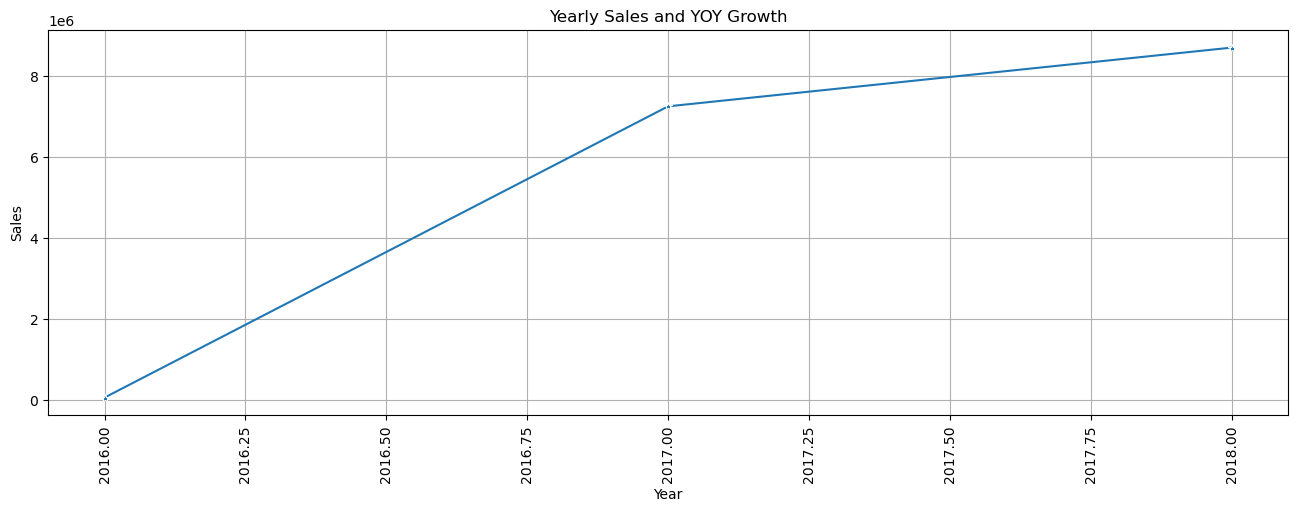

In [15]:
query = """ select 
            *,
            ((sales - lag(sales) over(order by years))/lag(sales) over(order by years))*100 as YOY
            from(
                select year(orders.order_purchase_timestamp) years , round(sum(payments.payment_value),3) sales
                from ecommerce.orders
                join ecommerce.payments on orders.order_id = payments.order_id
                group by years
                order by years) t; """

cur.execute(query)
data = cur.fetchall()
df = pd.DataFrame(data, columns=['year','sales','YOY'])
df

plt.figure(figsize=(16,5))
sns.lineplot(x='year', y='sales', data=df, marker='*')
plt.title('Yearly Sales and YOY Growth')
plt.xlabel('Year')
plt.ylabel('Sales')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

<strong><h2>Identify the top 3 customers who spent the most money in each year.

In [16]:
query = """ with purchase as 
                (select year(orders.order_purchase_timestamp) years, orders.customer_id, sum(payments.payment_value) purchase 
                from ecommerce.orders
                join ecommerce.payments on payments.order_id = orders.order_id
                group by years, customer_id
                order by years, purchase desc),
            top_purchasers as (select *, dense_rank() over(partition by years order by purchase Desc) rnk from purchase)
            select * from top_purchasers
            where rnk<=3; """
cur.execute(query)
data = cur.fetchall()
df = pd.DataFrame(data,columns=['year','customer_id','sales', 'rank'])
df

,year,customer_id,sales,rank
0,2016,a9dc96b027d1252bbac0a9b72d837fc6,1423.550049,1
1,2016,1d34ed25963d5aae4cf3d7f3a4cda173,1400.739990,2
2,2016,4a06381959b6670756de02e07b83815f,1227.780029,3
3,2017,1617b1357756262bfa56ab541c47bc16,13664.080078,1
4,2017,c6e2731c5b391845f6800c97401a43a9,6929.310059,2
5,2017,3fd6777bbce08a352fddd04e4a7cc8f6,6726.660156,3
6,2018,ec5b2ba62e574342386871631fafd3fc,7274.879883,1
7,2018,f48d464a0baaea338cb25f816991ab1f,6922.209961,2
8,2018,e0a2412720e9ea4f26c1ac985f6a7358,4809.439941,3
